<a href="https://colab.research.google.com/github/jkat-dream/TIL/blob/main/fix%3A%20the%20grahp%20mini_project_personal_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("/content/drive/MyDrive/mini project#1/파이널프로젝트_RAW_210329_210926.xlsx")

In [ ]:
df.head(3)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04


In [ ]:
df['completed_at_ym'] = pd.to_datetime(df['completed_at'])
set_of_year_month = list(set([(x.year, x.month) for x in df['completed_at']]))
for ym in sorted(set_of_year_month, key=lambda x: (x[0], x[1])):
  print(f'{ym[0]}년 {ym[1]}월')

2021년 3월
2021년 4월
2021년 5월
2021년 6월
2021년 7월
2021년 8월
2021년 9월


마케팅 시작일과 구매일자를 비교해서 마케팅이 효과를 내기시작하는 날을 구한다.

월별판매액
일별판매액
품목별 판매건수
RFM분석-최근구매, 자주구매, 지출을 많이 하는
재구매 비율
어떤 format이 가장 많이 팔렸는지
어떤 카테고리가 가장 많이 팔렸는지

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [ ]:
#코호트 분석
co_df = df[['customer_id', 'completed_at']]
co_df.head

<bound method NDFrame.head of         customer_id        completed_at
0          504760.0 2021-03-28 15:00:11
1          432862.0 2021-03-28 15:16:53
2           72297.0 2021-03-28 15:21:43
3           72297.0 2021-03-28 15:21:43
4          478028.0 2021-03-28 15:21:54
...             ...                 ...
105414     640697.0 2021-09-25 14:10:42
105415     670896.0 2021-09-25 14:16:33
105416     640697.0 2021-09-25 14:17:41
105417     670896.0 2021-09-25 14:19:56
105418     610626.0 2021-09-25 14:25:47

[105419 rows x 2 columns]>

In [ ]:
co_df['completed_at'].dtype

dtype('<M8[ns]')

In [ ]:
co_df['order-period'] = co_df['completed_at'].dt.strftime('%Y-%m')
co_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,completed_at,order-period
0,504760.0,2021-03-28 15:00:11,2021-03
1,432862.0,2021-03-28 15:16:53,2021-03
2,72297.0,2021-03-28 15:21:43,2021-03
3,72297.0,2021-03-28 15:21:43,2021-03
4,478028.0,2021-03-28 15:21:54,2021-03


In [ ]:
#동일한 경험을 첫 번째 주문으로 가정하고 사용자 유지율을 분석함
co_df.set_index('customer_id', inplace=True)
co_df.head()

,completed_at,order-period
customer_id,,
504760.0,2021-03-28 15:00:11,2021-03
432862.0,2021-03-28 15:16:53,2021-03
72297.0,2021-03-28 15:21:43,2021-03
72297.0,2021-03-28 15:21:43,2021-03
478028.0,2021-03-28 15:21:54,2021-03


In [ ]:
FirstOrder=df.groupby(co_df.index)['completed_at'].min()
FirstOrder.head()

customer_id
16.0   2021-04-28 15:55:26
46.0   2021-05-02 20:28:11
47.0   2021-04-29 18:32:15
79.0   2021-03-30 13:59:52
96.0   2021-09-21 17:51:18
Name: completed_at, dtype: datetime64[ns]

In [ ]:
FirstOrder = FirstOrder.dt.strftime('%Y-%m')

In [ ]:
co_df['FirstOrder'] = FirstOrder
co_df.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
co_df

,customer_id,completed_at,order-period,FirstOrder
0,504760.0,2021-03-28 15:00:11,2021-03,2021-03
1,432862.0,2021-03-28 15:16:53,2021-03,2021-03
2,72297.0,2021-03-28 15:21:43,2021-03,2021-03
3,72297.0,2021-03-28 15:21:43,2021-03,2021-03
4,478028.0,2021-03-28 15:21:54,2021-03,2021-03
...,...,...,...,...
105414,640697.0,2021-09-25 14:10:42,2021-09,2021-09
105415,670896.0,2021-09-25 14:16:33,2021-09,2021-09
105416,640697.0,2021-09-25 14:17:41,2021-09,2021-09
105417,670896.0,2021-09-25 14:19:56,2021-09,2021-09


In [ ]:
grouped = co_df.groupby (['FirstOrder', 'order-period'])

In [ ]:
cohorts=grouped['customer_id'].nunique()
cohorts.head()

FirstOrder  order-period
2021-03     2021-03         3123
            2021-04          446
            2021-05          268
            2021-06          216
            2021-07          190
Name: customer_id, dtype: int64

In [ ]:
cohorts=cohorts.reset_index()
cohorts.head()

,FirstOrder,order-period,customer_id
0,2021-03,2021-03,3123
1,2021-03,2021-04,446
2,2021-03,2021-05,268
3,2021-03,2021-06,216
4,2021-03,2021-07,190


customer id는 처음 가져왔을때 고객별 데이터였지만 지금은 순방문자수를 집계한 데이터로 구성됨.

In [ ]:
cohorts.rename({'customer_id':'totalusers'}, axis=1, inplace=True)
cohorts.head()

,FirstOrder,order-period,totalusers
0,2021-03,2021-03,3123
1,2021-03,2021-04,446
2,2021-03,2021-05,268
3,2021-03,2021-06,216
4,2021-03,2021-07,190


In [ ]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2021-03    7
2021-04    6
2021-05    5
2021-06    4
2021-07    3
2021-08    2
2021-09    1
Name: FirstOrder, dtype: int64

In [ ]:
cohortperiod=[]
for x in each_period:
  for y in range(x):
    cohortperiod.append(y)

In [ ]:
cohorts['cohortperiod'] = cohortperiod
cohorts.head()

,FirstOrder,order-period,totalusers,cohortperiod
0,2021-03,2021-03,3123,0
1,2021-03,2021-04,446,1
2,2021-03,2021-05,268,2
3,2021-03,2021-06,216,3
4,2021-03,2021-07,190,4


In [ ]:
cohorts.set_index(['FirstOrder', 'cohortperiod'], inplace=True)
cohorts.head()

order-period  totalusers
FirstOrder cohortperiod                         
2021-03    0                 2021-03        3123
           1                 2021-04         446
           2                 2021-05         268
           3                 2021-06         216
           4                 2021-07         190

In [ ]:
cohorts=cohorts['totalusers'].unstack(1)
cohorts

cohortperiod,0,1,2,3,4,5,6
FirstOrder,,,,,,,
2021-03,3123.0,446.0,268.0,216.0,190.0,199.0,121.0
2021-04,10471.0,1118.0,773.0,601.0,480.0,375.0,NaN
2021-05,10987.0,1572.0,504.0,410.0,278.0,NaN,NaN
2021-06,9251.0,727.0,370.0,230.0,NaN,NaN,NaN
2021-07,8260.0,970.0,278.0,NaN,NaN,NaN,NaN
2021-08,7495.0,847.0,NaN,NaN,NaN,NaN,NaN
2021-09,4166.0,NaN,NaN,NaN,NaN,NaN,NaN


처음의 순방문자 수에 비해 각 기간의 순방문자수가 얼마나 변화하였는지에 대한 것

In [ ]:
user_retention = cohorts.divide(cohorts[0], axis=0)
user_retention

cohortperiod,0,1,2,3,4,5,6
FirstOrder,,,,,,,
2021-03,1.0,0.142811,0.085815,0.069164,0.060839,0.063721,0.038745
2021-04,1.0,0.106771,0.073823,0.057397,0.045841,0.035813,NaN
2021-05,1.0,0.143078,0.045872,0.037317,0.025303,NaN,NaN
2021-06,1.0,0.078586,0.039996,0.024862,NaN,NaN,NaN
2021-07,1.0,0.117433,0.033656,NaN,NaN,NaN,NaN
2021-08,1.0,0.113009,NaN,NaN,NaN,NaN,NaN
2021-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN


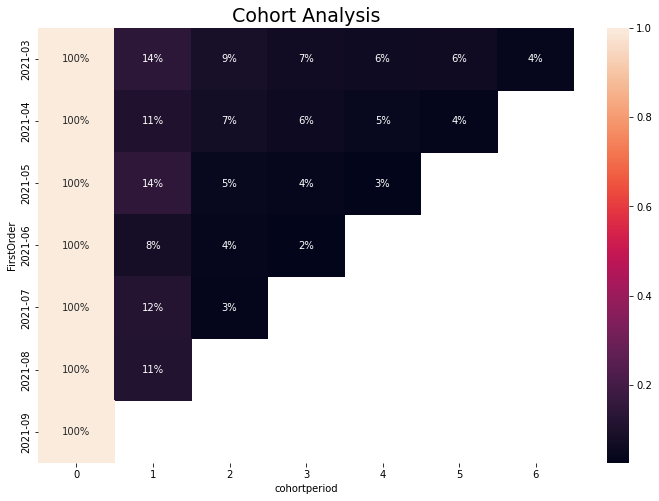

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

In [ ]:
print(df['format'].value_counts())

올인원        87402
RED         6253
온라인 완주반     3817
하루10분컷      2978
B2B 온라인     1086
스쿨 온라인      1057
스쿨          1036
B2B          808
B2G          592
이벤트          193
아카이브          72
MBA           56
캠프            48
관리             2
콜로소            2
온라인            1
Name: format, dtype: int64


In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [4]:
from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')

<function matplotlib.pyplot.show>

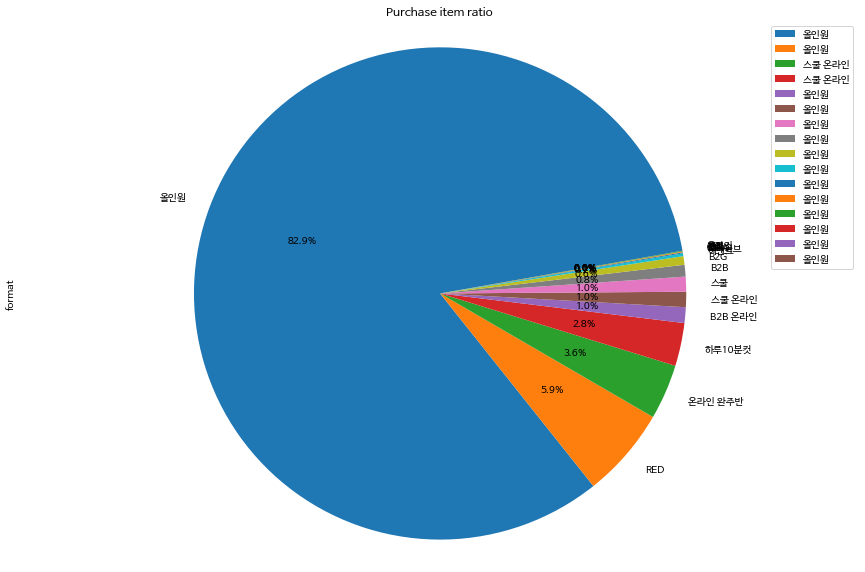

In [6]:
df['format'].value_counts().plot(kind='pie', figsize=(15,10), autopct='%1.1f%%', startangle=10)
plt.title('Purchase item ratio', size=12)
plt.axis('equal')
plt.legend(labels=df['format'], loc='upper right')
plt.show

In [ ]:
#RFM분석
df_user = pd.DataFrame(df['customer_id'])
df_user.columns=['customer_id']
df_max_purchase = df.groupby('customer_id')['completed_at'].max().reset_index()
df_max_purchase.rename(columns = {'completed_at': 'max_purchase'}, inplace = True)

In [ ]:
df_max_purchase['recency'] = (df_max_purchase['max_purchase'].max() - df_max_purchase['max_purchase']).dt.days
df_user = pd.merge(df_user, df_max_purchase[['customer_id', 'recency']], on='customer_id')

In [ ]:
df_user.recency.describe()

count    105416.000000
mean         88.170183
std          51.661475
min           0.000000
25%          43.000000
50%          88.000000
75%         132.000000
max         180.000000
Name: recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


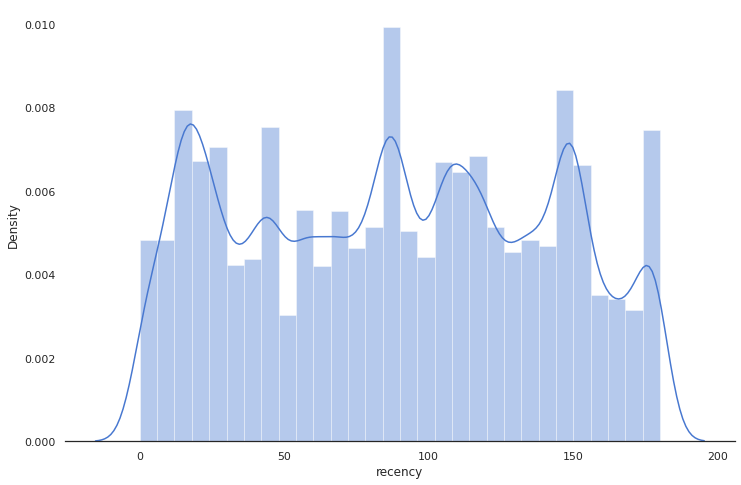

In [ ]:
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12,8))
sns.despine(left=True)
sns.distplot(df_user['recency'], bins=30)
plt.show()

데이터상 전체 고객의 가장 ㅗ치근 구매 날짜를 기준으로 잡고 이 날짜와 고객 각 한명당 최근에 구매한 날짜 차이의 평균은 88일 전이라는 것을 확인
그 시간 차이의 흐름을 확인한 그래프임

In [ ]:
#frequency
df_frequency = df.groupby ('customer_id').completed_at.count().reset_index()
df_frequency.rename(columns={'completed_at':'frequency'}, inplace = True)

df_user = pd.merge(df_user, df_frequency, on='customer_id')
df_user.frequency.describe()

count    105416.000000
mean          3.797564
std           5.481445
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          78.000000
Name: frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


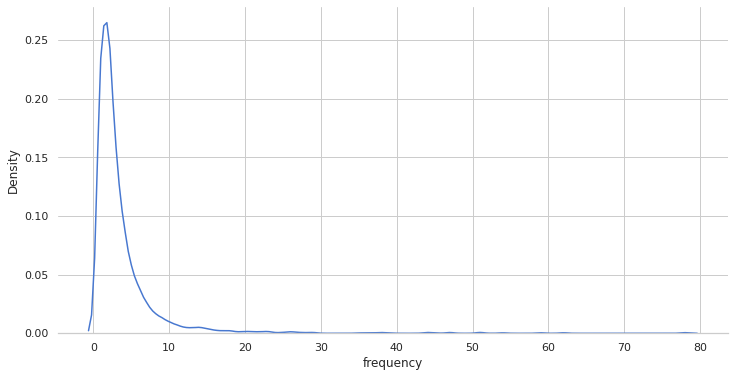

In [ ]:
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['frequency'], hist=False)
plt.show()

In [ ]:
#monetary
df_revenue = df.groupby('customer_id').transaction_amount.sum().reset_index()
df_revenue.rename(columns={'transaction_amount':'revenue'}, inplace = True)
df_user = pd.merge(df_user, df_revenue, on = 'customer_id')
df_user.revenue.describe()

count    1.054160e+05
mean     4.844569e+05
std      1.324733e+06
min     -4.016574e+06
25%      1.390000e+05
50%      2.670000e+05
75%      5.160000e+05
max      1.355400e+08
Name: revenue, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


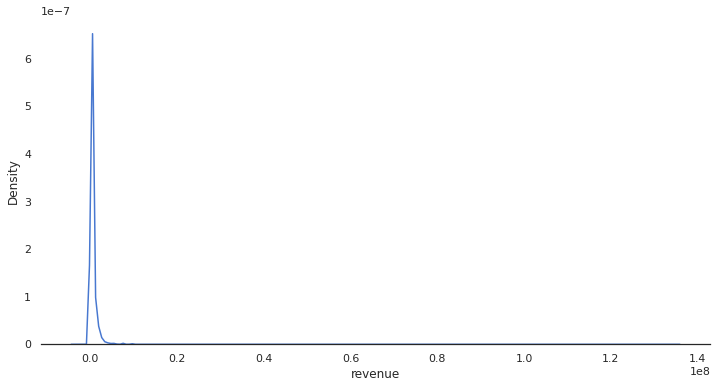

In [ ]:
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['revenue'], hist=False)
plt.show()

In [ ]:
df_user.head()

,customer_id,recency,frequency,revenue
0,504760.0,180,1,90500
1,432862.0,180,1,96000
2,72297.0,42,9,1008120
3,72297.0,42,9,1008120
4,72297.0,42,9,1008120


In [ ]:
def rec(x):
  if x <= 42:
    return 1
  elif x <= 88:
    return 2
  elif x <=132:
    return 3
  else:
    return 4

df_user['recency_score'] = df_user['recency'].map(rec)

In [ ]:
def fre(x):
  if x <= 1:
    return 1
  elif x <= 3.7:
    return 2
  elif x <=4:
    return 3
  else:
    return 4

df_user['frequency_score'] = df_user['frequency'].map(fre)

In [ ]:
def rev(x):
  if x <= 1.390000e+05:
    return 1
  elif x <= 4.844569e+05:
    return 2
  elif x<= 5.160000e+05:
    return 3
  else:
    return 4

df_user['revenue_score'] = df_user['revenue'].map(rev)

In [ ]:
df_user.head()

,customer_id,recency,frequency,revenue,recency_score,frequency_score,revenue_score
0,504760.0,180,1,90500,4,1,1
1,432862.0,180,1,96000,4,1,1
2,72297.0,42,9,1008120,1,4,4
3,72297.0,42,9,1008120,1,4,4
4,72297.0,42,9,1008120,1,4,4


초우량 고객 rfm이 모두 높음
저수익성 고객 rf는 높지만 m이 낮음
신규고객rm은 높지만 f가 낮은 고객
이탈고객 fm은 높지만r이 낮은 고객

r,f,m >= 3 ; 초우량 고객
r,f>=3, m < 3; 저수익성 고객
r,m >=3, f < 3; 신규고객
f,m>=3, r< 3;이탈고객
r,f,m < 3:기타 

In [ ]:
def type(x,y,z):
  if x >= 3 and y>= 3 and z >= 3:
    return "type_1"
  elif x >= 3 and y >= 3 and z < 3:
    return "type_2"
  elif x >= 3 and z >= 3 and y < 3:
    return "type_3"
  elif y >= 3 and z >= 3 and x < 3:
    return "type_4"
  else:
    return "tyep_5"

In [ ]:
df_user['customer_type'] = df_user.apply(lambda row: type(row['recency_score'], row['frequency_score'], row['revenue_score']), axis=1)

In [ ]:
df_user.head()

,customer_id,recency,frequency,revenue,recency_score,frequency_score,revenue_score,customer_type
0,504760.0,180,1,90500,4,1,1,tyep_5
1,432862.0,180,1,96000,4,1,1,tyep_5
2,72297.0,42,9,1008120,1,4,4,type_4
3,72297.0,42,9,1008120,1,4,4,type_4
4,72297.0,42,9,1008120,1,4,4,type_4


In [ ]:
df_customer = df_user[['customer_type', 'revenue']]

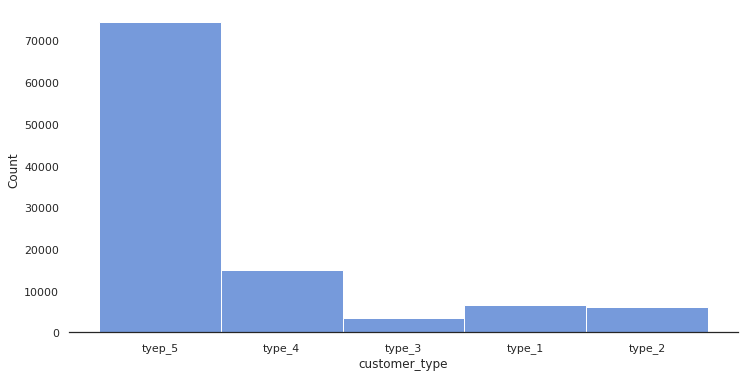

In [ ]:
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.histplot(data=df_customer, x='customer_type')
plt.show()

In [ ]:
avg_revenue = df_user.groupby('customer_type').revenue.agg(['mean','min','max'])
avg_revenue

,mean,min,max
customer_type,,,
tyep_5,2.432395e+05,-4016574,135540000
type_1,9.594481e+05,484900,7200000
type_2,3.062695e+05,-474500,484000
type_3,9.700489e+05,484500,113400000
type_4,1.434937e+06,484600,25440000
